In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### a. Descargar y Leer el archivo de Base de Datos por Municipio 2020 del índice de marginación desde la página de descargas del gobierno federal mexicano en un dataframe. Los datos se encuentran en la pestaña "IMM 2020".



In [2]:
df = pd.read_excel('http://www.conapo.gob.mx/work/models/CONAPO/Marginacion/Datos_Abiertos/Municipio/IMM_2020.xls',sheet_name='IMM_2020')  

In [4]:
df.head(7)

,CVE_ENT,NOM_ENT,CVE_MUN,NOM_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,GM_2020,IMN_2020
0,1,Aguascalientes,1001,Aguascalientes,948990,1.644738,20.367220,0.104799,0.113169,0.378610,0.591434,10.339530,7.523683,54.226594,60.318795,Muy bajo,0.944508
1,1,Aguascalientes,1002,Asientos,51536,3.526405,33.906364,2.650373,0.486448,0.858160,1.352430,22.942305,78.221049,78.565471,56.546071,Muy bajo,0.885433
2,1,Aguascalientes,1003,Calvillo,58250,4.491509,42.482450,0.365177,0.516760,0.800978,1.040411,19.219858,51.301288,79.259777,57.058251,Muy bajo,0.893453
3,1,Aguascalientes,1004,Cosío,17000,3.144867,27.696745,0.712855,0.577354,0.659833,1.030989,22.716866,65.470588,81.726369,57.114030,Muy bajo,0.894326
4,1,Aguascalientes,1005,Jesús María,129929,2.380588,26.692477,0.277034,0.354957,0.860426,1.312652,16.404575,37.164143,56.748753,59.011762,Muy bajo,0.924042
5,1,Aguascalientes,1006,Pabellón de Arteaga,47646,2.732339,25.724280,0.541338,0.425487,1.044760,0.705635,19.075954,32.764555,64.335011,58.624768,Muy bajo,0.917982
6,1,Aguascalientes,1007,Rincón de Romos,57369,3.445917,27.094343,0.965870,0.501341,1.027223,1.302663,20.975502,44.285241,76.643972,57.646671,Muy bajo,0.902667


###b. Mostrar la descripción del DataFrame (medias, máximos mínimos, etc...) mostrart algunos hallazgos interesantes de la simple inspección visual y por estadísticas básicas de los datos.

In [5]:
#  descripción del DataFrame
df.describe()

,CVE_ENT,CVE_MUN,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020,IMN_2020
count,2469.000000,2469.000000,2.469000e+03,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000,2469.000000
mean,19.215472,19324.164844,5.103849e+04,10.164466,45.853026,3.159963,1.500793,6.118145,7.987232,26.566286,69.900469,82.143854,53.955581,0.844869
std,7.367340,7382.892458,1.469907e+05,7.633633,13.981594,5.289299,2.769167,9.245995,8.973591,10.586540,35.267726,11.830444,3.904590,0.061140
min,1.000000,1001.000000,8.100000e+01,0.353446,5.535137,0.000000,0.000000,0.000000,0.000000,3.950392,0.000000,28.453113,21.406635,0.335198
25%,14.000000,14079.000000,4.489000e+03,4.427755,35.737568,0.651869,0.366077,0.878499,1.654653,18.725100,40.129696,74.615600,51.844432,0.811812
50%,20.000000,20226.000000,1.355200e+04,8.202762,46.339439,1.428250,0.828157,2.452316,4.714141,25.000000,100.000000,84.643266,54.423506,0.852196
75%,24.000000,24027.000000,3.528400e+04,13.787294,55.856378,3.342618,1.678328,7.285869,11.029646,32.820816,100.000000,91.620112,56.696126,0.887782
max,32.000000,32058.000000,1.922523e+06,53.071253,88.328076,64.450424,53.065463,81.788441,68.149764,69.564018,100.000000,100.000000,62.397145,0.977052


Algunos hallazgos interesantes que se pueden ver a simple vista son:


*   Hay en total 2469 municipios en la muestra
*   La media del porcentaje de la poblacion analfabeta es del 10.16% y el porcentaje de la poblacion sin estudios basicos abarca hasta  el 45.85%. Lo cual es algo alarmante que casi el 50% de la poblacion no pudiera terminar la educación basica.
*   El nivel de viviendas sin luz electrica es muy bajo con una media del 1.5% al igual que el nivel de viviendas sin drenaje ni excusado el cual llega solo al 3.15%.
*   La mayoria de la poblacion tiene ingresos menores a 2 salarios minimos



###c. Realizar una gráfica que permita ver el porcentaje de municipios por estado con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en archivo png Nueva sección

In [28]:
marginacion = df.groupby(['NOM_ENT','GM_2020'])[['NOM_MUN']].count().reset_index()
marginacion_total = marginacion.groupby('NOM_ENT')['NOM_MUN'].transform('sum')

In [29]:
marginacion['Porcentaje'] = (marginacion['NOM_MUN'] / marginacion_total) * 100
marginacion = marginacion.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'NOM_MUN':'Municipios'})
marginacion.head()

,Estado,Grado de marginación,Municipios,Porcentaje
0,Aguascalientes,Muy bajo,11,100.000000
1,Baja California,Medio,1,16.666667
2,Baja California,Muy bajo,5,83.333333
3,Baja California Sur,Muy bajo,5,100.000000
4,Campeche,Alto,2,16.666667


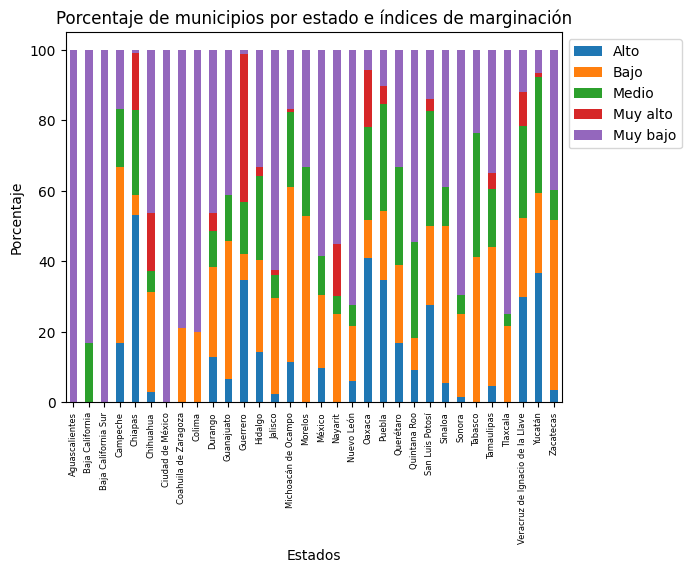

In [43]:
resultado = marginacion.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

resultado.plot(kind='bar', stacked=True)

plt.title('Porcentaje de municipios por estado e índices de marginación')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(fontsize=6) 
plt.savefig('MarginacionPorMunicipios.png')
plt.show()

###d.Realizar una gráfica que muestre el porcentaje de la población, respecto a la población total de cada estado, con índices de marginación "muy bajo", "bajo", "medio", "alto" y "muy alto". Guarda la gráfica en formato jpg  Nueva sección

In [31]:
marginacion_poblacion = df.groupby(['NOM_ENT','GM_2020'])[['POB_TOT']].sum().reset_index()
total_por_estado = marginacion_poblacion.groupby('NOM_ENT')['POB_TOT'].transform('sum')
marginacion_poblacion['Porcentaje'] = (marginacion_poblacion['POB_TOT'] / total_por_estado) * 100
marginacion_poblacion = marginacion_poblacion.rename(columns={'NOM_ENT':'Estado', 'GM_2020': 'Grado de marginación', 'POB_TOT':'Población'})
marginacion_poblacion.head()

,Estado,Grado de marginación,Población,Porcentaje
0,Aguascalientes,Muy bajo,1425607,100.000000
1,Baja California,Medio,117568,3.119325
2,Baja California,Muy bajo,3651452,96.880675
3,Baja California Sur,Muy bajo,798447,100.000000
4,Campeche,Alto,78627,8.469424


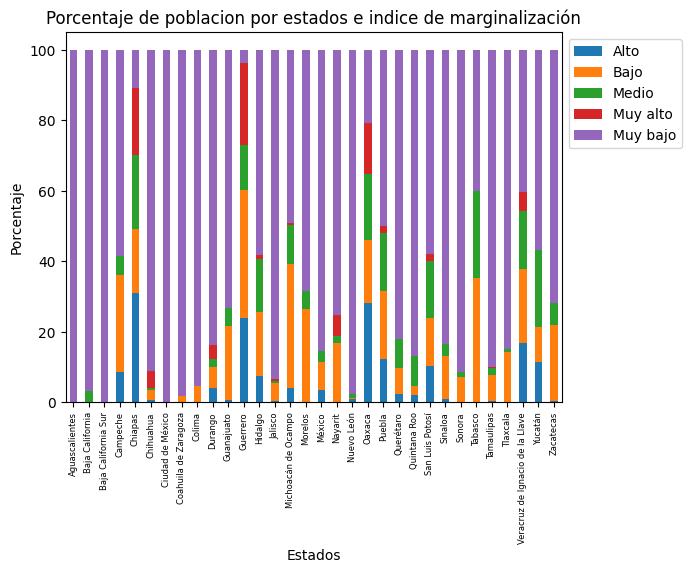

In [44]:
resultado = marginacion_poblacion.groupby(['Estado', 'Grado de marginación'])['Porcentaje'].sum().unstack()

resultado.plot(kind='bar', stacked=True)

plt.title('Porcentaje de poblacion por estados e indice de marginalización')
plt.xlabel('Estados')
plt.ylabel('Porcentaje')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(fontsize=6) 
plt.savefig('MarginacionPorPoblacion.jpg')
plt.show()

##e. ¿Hay coincidencias entra la gráficas anteriores?  ¿Algún hallazgo? Comenta tu análisis.

Si analizamos con detenimiento ambas graficas podemos ver como la segunda gráfica muestra con más detalle los niveles de marginación por estado con respecto a la primera, denotando que las poblaciones con índices de mayor marginación son Chiapas, Guerrero, Oaxaca y Veracruz. Dándonos a conocer que estos son los estados con mayor nivel de pobreza en México. 

En el otro lado de la moneda, algunos de los estados con menor nivel de marginación son ciudad de México, Baja California, Nuevo León, Sonora, entre otros, que forman la mayoría de los estados. Esto dándonos buena señal que aunque algunos estados sufren un gran porcentaje de marginación, esto no ocurre en todo el país.

##f. Relación de porcentaje de analfabetismo respecto al porcentaje de poblaciones en localidades de menos de 5,000 habitantes.

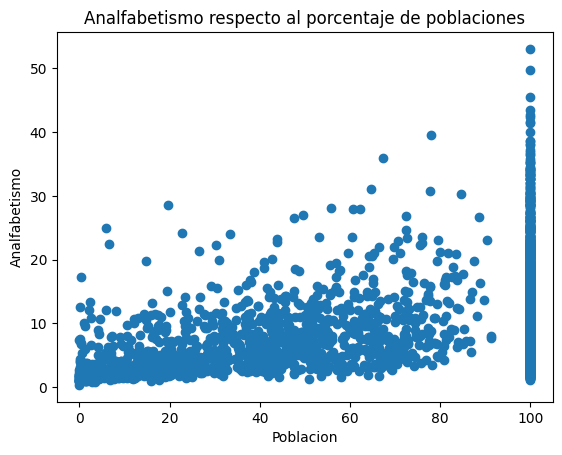

In [48]:
plt.scatter(x=df["PL.5000"], y=df["ANALF"])
plt.xlabel('Poblacion')
plt.ylabel('Analfabetismo')
plt.title('Analfabetismo respecto al porcentaje de poblaciones')
plt.show()

##g. ¿Existe una relación? ¿Cómo podrías analizar con que variable tiene más correlación el porcentaje de analfabetismo en personas mayores de 15 años?

Para realizar una mejor respuesta y analisis sobre la correlacion entre estas dos columnas, me ayudaré de una matriz de correlaciones. La cual es una tabla que indica los coeficientes de conexión entre los factores. Cada celda de la tabla nos muestra la conexión entre dos factores.


In [49]:
num_df = df[['POB_TOT', 'ANALF', 'SBASC','OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IM_2020']]

matriz_corr = num_df.corr()
matriz_corr

,POB_TOT,ANALF,SBASC,OVSDE,OVSEE,OVSAE,OVPT,VHAC,PL.5000,PO2SM,IM_2020
POB_TOT,1.000000,-0.236801,-0.387466,-0.111017,-0.105180,-0.092102,-0.161628,-0.206148,-0.422541,-0.410937,0.315036
ANALF,-0.236801,1.000000,0.779053,0.347537,0.351523,0.360644,0.644960,0.658532,0.449324,0.620011,-0.847822
SBASC,-0.387466,0.779053,1.000000,0.259337,0.296920,0.269822,0.548058,0.521014,0.598548,0.702248,-0.768872
OVSDE,-0.111017,0.347537,0.259337,1.000000,0.529746,0.219278,0.279222,0.374002,0.205200,0.204174,-0.566430
OVSEE,-0.105180,0.351523,0.296920,0.529746,1.000000,0.343723,0.501319,0.308139,0.231066,0.197733,-0.636501
OVSAE,-0.092102,0.360644,0.269822,0.219278,0.343723,1.000000,0.391056,0.319650,0.189617,0.276074,-0.581819
OVPT,-0.161628,0.644960,0.548058,0.279222,0.501319,0.391056,1.000000,0.615184,0.338568,0.477667,-0.772474
VHAC,-0.206148,0.658532,0.521014,0.374002,0.308139,0.319650,0.615184,1.000000,0.269036,0.580601,-0.731332
PL.5000,-0.422541,0.449324,0.598548,0.205200,0.231066,0.189617,0.338568,0.269036,1.000000,0.575018,-0.586803
PO2SM,-0.410937,0.620011,0.702248,0.204174,0.197733,0.276074,0.477667,0.580601,0.575018,1.000000,-0.699429


Como se puede observar en la tabla no existe gran relacion entre las columnas "PL.500" y "ANALF" con tan solo el 0.44 de correlacion no llega ni a 0.5, pero por otra parte con la que si tiene mayor correlacion es con la columna "SBASC" que nos representa el porcentaje de población de personas con 15 años o más sin educación básica, la cual tiene mayor sentido que tenga una correlacion ya que logigamente si una persona no obtuvo educacion es muy probable que tambien sea analfabeta.

## g. Desarrolla un nuevo DataFrame con indicadores interesantes por estado que se obtengan de los datos a nivel municipal y que pudieran ser de importancia a la hora de definir políticas públicas. Se va a calificar la originalidad de los indicadores. Justifica las decisiones que tomes, y guarda el nuevo dataframe en formato parquet.